In [0]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img
import os
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Dropout, Input
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.common.image_dim_ordering()
from tensorflow.keras.callbacks import EarlyStopping

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from PIL import Image
import glob
import cv2
train_images=[]
c=0
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/chest_xray/train/NORMAL/*.jpeg'):
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal, (128,128))
    train_images.append([output,0])

In [0]:
c=0
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/chest_xray/train/PNEUMONIA/*.jpeg'): 
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal,(128,128))
    train_images.append([output,1])
  


In [0]:
import random
random.shuffle(train_images)

In [0]:
x_train=[]
y_train=[]
for im,label in train_images:
  x_train.append(im)
  y_train.append(label)

In [0]:
128,128,3
[[][][],[][][]]
[[[][][]],[[][][]]]

In [0]:
x_train=np.array(x_train).reshape(-1,128,128,3)

In [0]:
test_images=[]
c=0
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/chest_xray/test/NORMAL/*.jpeg'): 
    img_normal = cv2.imread(filename)
    output = cv2.resize(img_normal, (128,128))
    test_images.append([output,0])
   

In [0]:
c=0
for filename in glob.glob('/content/drive/My Drive/Colab Notebooks/chest_xray/test/PNEUMONIA/*.jpeg'): 
    img_normal = cv2.imread(filename)
    #print(im.shape)
    #print(type(im.shape))
    output = cv2.resize(img_normal, (128,128))
    test_images.append([output,1])
    

In [0]:
random.shuffle(test_images)

In [0]:
x_test=[]
y_test=[]
for im,label in test_images:
  x_test.append(im)
  y_test.append(label)

In [0]:
x_test=np.array(x_test).reshape(-1,128,128,3)

In [0]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


 n p
[1 0] 
[0 1]

In [0]:
x_test = x_test.astype('float32')
x_train = x_train.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
np.save("/content/drive/My Drive/Colab Notebooks/chest_xray/x_train.npy", x_train)
np.save("/content/drive/My Drive/Colab Notebooks/chest_xray/y_train.npy", y_train)
np.save("/content/drive/My Drive/Colab Notebooks/chest_xray/x_test.npy", x_test)
np.save("/content/drive/My Drive/Colab Notebooks/chest_xray/y_test.npy", y_test)

In [0]:
x_train=np.load("/content/drive/My Drive/Colab Notebooks/chest_xray/x_train.npy")
x_test=np.load("/content/drive/My Drive/Colab Notebooks/chest_xray/x_test.npy")
y_train=np.load("/content/drive/My Drive/Colab Notebooks/chest_xray/y_train.npy")
y_test=np.load("/content/drive/My Drive/Colab Notebooks/chest_xray/y_test.npy")

In [0]:
x_train.shape
x_test.shape

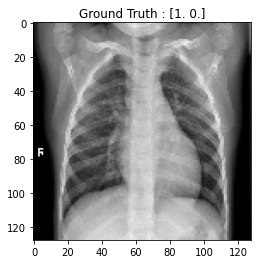

In [0]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(y_train[10]))
plt.show()

In [0]:
#x_train

In [0]:
num_classes = y_test.shape[1]


In [0]:
model = Sequential()
model.add(Conv2D(150, (3, 3), input_shape=(x_train.shape[1:]), padding='same', activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(150, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(150, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='sigmoid'))

In [0]:
epochs = 150
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
monitor=EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',restore_best_weights=True)

In [0]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[monitor],epochs=epochs, batch_size=64)

In [0]:
import pickle
with open("/content/drive/My Drive/Colab Notebooks/chest_xray/MODEL_V3_PN.pk2",'wb') as file:
      pickle.dump(model,file)

In [0]:
x=model.predict_classes(x_test[[2],:])
print(x[0])
print(y_test[2])

In [0]:
model.save('version3.h5')

In [0]:
!pip install wandb

     |████████████████████████████████| 1.4MB 3.4MB/s 
     |████████████████████████████████| 102kB 12.5MB/s 
     |████████████████████████████████| 460kB 52.0MB/s 
     |████████████████████████████████| 102kB 12.9MB/s 
     |████████████████████████████████| 112kB 56.3MB/s 
     |████████████████████████████████| 71kB 9.9MB/s 
     |████████████████████████████████| 71kB 9.4MB/s 
  Created wheel for watchdog: filename=watchdog-0.10.2-cp36-none-any.whl size=73605 sha256=de78b02bd9b47d99f0ab11091959b6f58a7669dbee84729602a61c5b610fca0b
  Stored in directory: /root/.cache/pip/wheels/bc/ed/6c/028dea90d31b359cd2a7c8b0da4db80e41d24a59614154072e
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=9f6d81ab3fc55a33fade7af54f327fb948392c9399bf6da6b8505cc4e9007dd3
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=fe

In [0]:
from keras.preprocessing.image import ImageDataGenerator
import wandb
from wandb.keras import WandbCallback

In [0]:
datagen=ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
datagen.fit(x_train)

[0 2 3
 1 2] 3 
 4 5 6]   [2 3
           5  6]

In [0]:
model1 = Sequential()
model1.add(Conv2D(64, (3, 3), input_shape=(x_train.shape[1:]), padding='same', activation='relu'))
model1.add(Dropout(0.3))
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.3))
model1.add(Flatten())
model1.add(Dense(64, activation='relu', kernel_constraint=maxnorm(3)))
model1.add(Dropout(0.3))
model1.add(Dense(num_classes, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [0]:
epochs = 100
lrate = 0.001
decay = lrate/epochs
sgd = Adam(lr=lrate)
batch_size=50
model1.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
wandb.init()
model1.fit_generator(datagen.flow(x_train, y_train),steps_per_epoch=x_train.shape[0] //batch_size,epochs=epochs, validation_data=(x_test, y_test), callbacks=[WandbCallback()])

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc



Epoch 1/100
104/104 [==============================] - 72s 695ms/step - loss: 0.5763 - accuracy: 0.8033 - val_loss: 0.5145 - val_accuracy: 0.7644
Epoch 2/100
104/104 [==============================] - 70s 678ms/step - loss: 0.1888 - accuracy: 0.9315 - val_loss: 0.7571 - val_accuracy: 0.6771
Epoch 3/100
104/104 [==============================] - 71s 679ms/step - loss: 0.1645 - accuracy: 0.9389 - val_loss: 0.6873 - val_accuracy: 0.7604
Epoch 4/100
104/104 [==============================] - 70s 677ms/step - loss: 0.1176 - accuracy: 0.9569 - val_loss: 0.8822 - val_accuracy: 0.7628
Epoch 5/100
104/104 [==============================] - 70s 675ms/step - loss: 0.1246 - accuracy: 0.9521 - val_loss: 0.4298 - val_accuracy: 0.8389
Epoch 6/100
104/104 [==============================] - 70s 675ms/step - loss: 0.1345 - accuracy: 0.9474 - val_loss: 0.9777 - val_accuracy: 0.7548
Epoch 7/100
104/104 [==============================] - 70s 675ms/step - loss: 0.1144 - accuracy: 0.9579 - val_loss: 1.2157 

In [0]:
model1.save("overfit")

In [0]:
x=model1.predict_classes(x_test[[3],:])
print(x[0])
print(y_test[3])

1
[0. 1.]


In [0]:
from keras.models import load_model
model2 = load_model('/content/model-best (1).h5')

In [0]:

for i in range(10):
  x=model2.predict_classes(x_test[[i],:])
  print(x[0])
  y=model2.predict(x_test[[i],:])
  print(max(y[0]))
  print(y_test[i])

1
0.8642188
[0. 1.]
1
0.9846029
[0. 1.]
0
0.4825939
[1. 0.]
1
0.81753147
[0. 1.]
0
0.92973095
[1. 0.]
0
0.9858246
[1. 0.]
1
0.9457206
[0. 1.]
1
0.99034065
[0. 1.]
1
0.99483126
[0. 1.]
0
0.9433131
[1. 0.]


In [0]:
x=model2.predict(x_test[[1],:])
print(max(x[0]))

0.9846029


In [0]:
#model.fit(x_train, y_train, epochs = 5, batch_size=batch_size, verbose = 1)
score,acc = model2.evaluate(x_test,y_test,verbose=2)
print(score)
print(acc)

0.42980013825954533
0.838942289352417


In [0]:
from keras.models import load_model
import cv2
im=cv2.imread("/content/save.jpeg")
output1 = cv2.resize(im, (128,128))
output1 = output1.astype('float')
output1 /= 255.0
output1 = np.array(output1).reshape(-1, 128, 128, 3)
classifer = load_model('/content/model-best.h5')
x = classifer.predict_classes(output1[[0], :])
if x[0] == 1:
   result = "PATIENT IS HAVING PNEMONIA "
else:
   result = "PATIENT IS NORMAL  "
j = classifer.predict(output1[[0], :])
k=max(j[0])*100
k=str(k)
k=k[:5]+"% Sure"
k="("+k+")"
result+=k
#    return result
print(result)

0.92517644
92.51
(92.51% Sure)
PATIENT IS NORMAL  (92.51% Sure)
